(5000, 2)
(5000,)


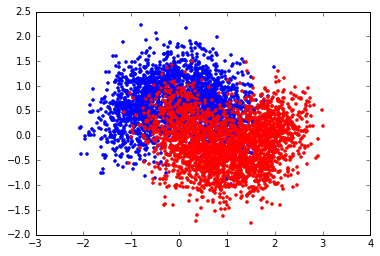

In [1]:
from sklearn import datasets
from polyssifier import Poly
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 

%matplotlib inline
data, label = make_moons(n_samples=5000, noise=0.4)
print(data.shape)
print(label.shape)

label0 = np.where(label==0)[0]
label1 = np.where(label==1)[0]

plt.plot(data[label0,0], data[label0,1],'.');
plt.plot(data[label1,0], data[label1,1],'r.');

In [2]:
# single class example
%rm -rf _models
pol = Poly(data,label, n_folds=5, verbose=1, feature_selection=False, scoring='f1')
scores= pol.run()


INFO:polyssifier.polyssifier:Building classifiers ...
INFO:polyssifier.polyssifier:Initialization, done.
INFO:polyssifier.polyssifier:Fold 1
INFO:polyssifier.polyssifier:Starting Multilayer Perceptron
INFO:polyssifier.polyssifier:Starting Nearest Neighbors
INFO:polyssifier.polyssifier:Starting SVM
INFO:polyssifier.polyssifier:Starting Linear SVM
INFO:polyssifier.polyssifier:Training Multilayer Perceptron
INFO:polyssifier.polyssifier:Training Nearest Neighbors
INFO:polyssifier.polyssifier:Reached limit of 4 concurrent processes...
INFO:polyssifier.polyssifier:Starting Decision Tree
INFO:polyssifier.polyssifier:Training SVM
INFO:polyssifier.polyssifier:Training Linear SVM
INFO:polyssifier.polyssifier:Multilayer Perceptron    :  Train 0.86, 31.82 sec
INFO:polyssifier.polyssifier:Nearest Neighbors        :  Train 0.86, 0.27 sec
INFO:polyssifier.polyssifier:SVM                      :  Train 0.85, 5.73 sec
INFO:polyssifier.polyssifier:Linear SVM               :  Train 0.83, 0.26 sec
INFO:pol

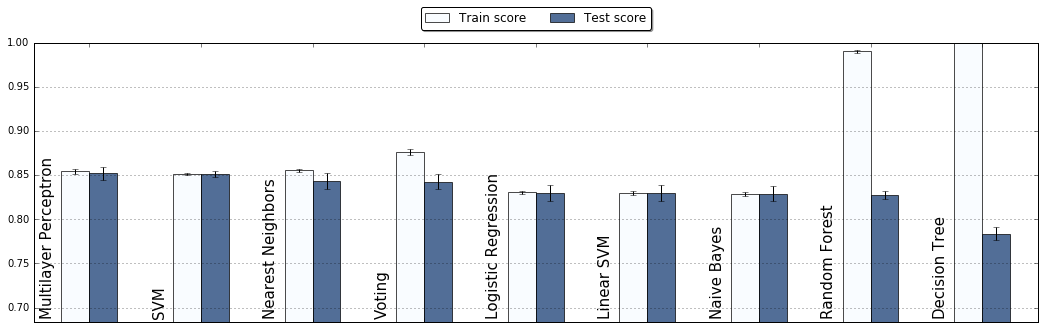

In [3]:
pol.plot()

In [4]:
for key, val in pol.confusions.items():
    print(key)
    print(val)


Multilayer Perceptron
[[ 2177.   323.]
 [  372.  2128.]]
Random Forest
[[ 2402.    98.]
 [  118.  2382.]]
Naive Bayes
[[ 2055.   445.]
 [  442.  2058.]]
SVM
[[ 2146.   354.]
 [  344.  2156.]]
Nearest Neighbors
[[ 2161.   339.]
 [  332.  2168.]]
Logistic Regression
[[ 2056.   444.]
 [  435.  2065.]]
Voting
[[ 2218.   282.]
 [  333.  2167.]]
Linear SVM
[[ 2060.   440.]
 [  441.  2059.]]
Decision Tree
[[ 2406.    94.]
 [  111.  2389.]]


In [5]:
#pol.predictions.head()
pol.predictions.sort_index(inplace=True)

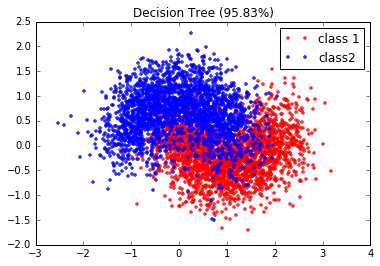

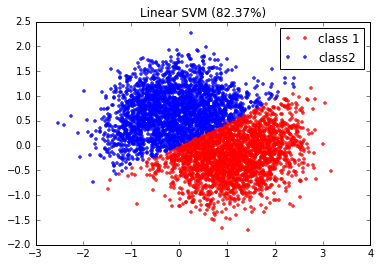

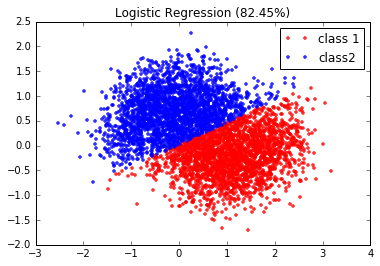

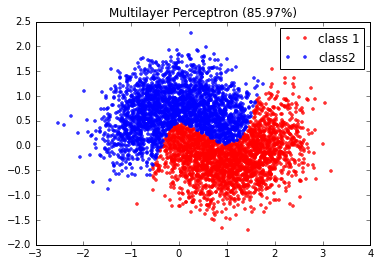

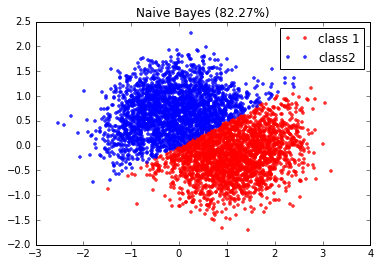

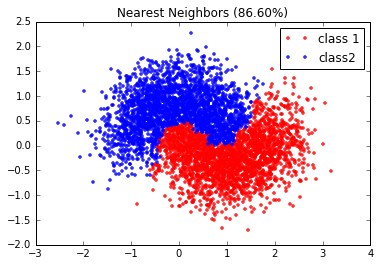

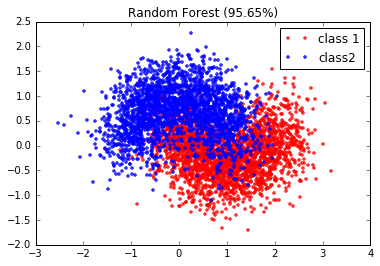

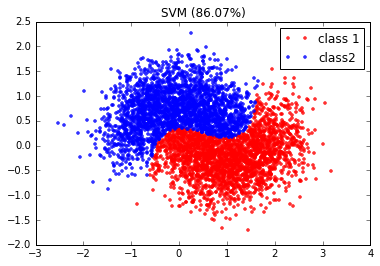

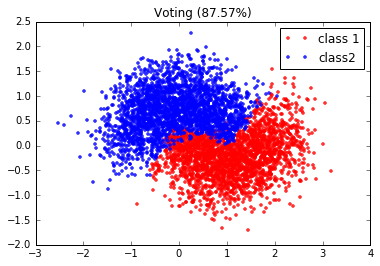

In [6]:
for key, pred in pol.predictions.items():
    plt.figure()
    missclass = np.where(pred==0)[0]
    corrclass = np.where(pred==1)[0]
    plt.plot(data[corrclass,0], data[corrclass,1],'r.', alpha=0.8);
    plt.plot(data[missclass,0], data[missclass,1],'b.', alpha=0.8);
    plt.legend(['class 1', 'class2'])
    plt.title('{0} ({1:.2f}%)'.format(key, 100*np.mean(pol.scores[key]['test']) ))